## 📌import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📌Load the dataset from a CSV file


In [2]:

def load_data(file_path):
    return pd.read_csv(file_path)

## 📌Pre-process the data: drop unnecessary columns and normalize features

-       Feature1  Feature2  Feature3
- 0       10        20        30
- 1       20        30        40
- 2       30        40        50
- 3       40        50        60


------------------------------------------

- Mean(Feature1) = (10 + 20 + 30 + 40) / 4 = 25 
- Mean(Feature2) = (20 + 30 + 40 + 50) / 4 = 35
- Mean(Feature3) = (30 + 40 + 50 + 60) / 4 = 45

-----------------------------------------

- Std(Feature1) = sqrt(((10-25)^2 + (20-25)^2 + (30-25)^2 + (40-25)^2) / 4) = sqrt(250) = 15.81
- Std(Feature2) = sqrt(((20-35)^2 + (30-35)^2 + (40-35)^2 + (50-35)^2) / 4) = sqrt(250) = 15.81
- Std(Feature3) = sqrt(((30-45)^2 + (40-45)^2 + (50-45)^2 + (60-45)^2) / 4) = sqrt(250) = 15.81


-------------------------------------------


> algebraic furmula : X_normalized = (original - mean ) / std

In [3]:
def preprocess_data(data):
    data = data.drop(columns=['Serial No.'])  # Drop 'Serial No.' column
    data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()  # Normalize features
    return data

## 📌Split the data into training and testing sets


In [4]:
def split_data(data, train_ratio):
    train_size = int(train_ratio * len(data))
    train_data = data[:train_size]
    test_data = data[train_size:]
    return train_data, test_data


## 📌Training phase
- linear regression model using gradient descent


In [5]:
n = 5
theta = np.zeros((n, 1))
print(theta)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
def train_model(X_train, y_train, alpha, iterations):

    # m = X_train.shape[0]
    m = len(y_train) # Number of samples (rows)
    n = X_train.shape[1]  # Number of features (columns)
    theta = np.zeros((n, 1))  # Initialize theta with zeros
    cost_history = []

    for i in range(iterations):  
        
        predictions = np.dot(X_train, theta)

        # Error
        error = predictions - y_train

        # Update theta
        theta -= (alpha / m) * np.dot(X_train.T, error)

        # Cost calculation and printing progress
        if i % 100 == 0:
            cost = np.sum(error ** 2) / (2 * m)
            print(f"Iteration {i}: Cost = {cost:.4f}")
            cost_history.append(cost)

    return theta, cost_history


## 📌Evaluation phase

In [7]:

def test_model(test_data, theta_trained):
 
    X_test = test_data.iloc[:, :-1].values  # Features
    y_test = test_data.iloc[:, -1].values.reshape(-1, 1)  # Target

    # Add bias term to features
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Predictions
    predictions_test = np.dot(X_test, theta_trained)

    #Mean Squared Error 
    mse = np.mean((predictions_test - y_test) ** 2)

    # Print evaluation metrics

    print("---------------------💡💡💡-------------------------")
    print(f"Evaluation Metrics:\nMean Squared Error on evaluation :  {mse :.4f}")
    
    return mse


## plotting 📊

In [8]:
def plot_error(cost_history):
    plt.plot(range(len(cost_history)), cost_history,'b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent: Cost vs. Iterations')
    plt.show()


## access to google colab account🗝️

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

## file path 🛣️

In [10]:
# file_path = '/content/drive/MyDrive/Shahid_Beheshti/402-403/Admission_Predict.csv'
file_path = './Admission_Predict.csv'
data = load_data(file_path)

## Configuration 🛠️ and running the code 🏃‍♂️

In [11]:

data = preprocess_data(data)
train_data, test_data = split_data(data, train_ratio=0.8)

In [12]:
alpha = 0.01  # Learning rate
iterations = 1000
X_train = train_data.iloc[:, :-1].values
# X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

theta_trained, cost_history = train_model(X_train, y_train, alpha, iterations)
mse = test_model(test_data, theta_trained)



Iteration 0: Cost = 0.2759
Iteration 100: Cost = 0.0369
Iteration 200: Cost = 0.0069
Iteration 300: Cost = 0.0028
Iteration 400: Cost = 0.0022
Iteration 500: Cost = 0.0021
Iteration 600: Cost = 0.0020
Iteration 700: Cost = 0.0020
Iteration 800: Cost = 0.0020
Iteration 900: Cost = 0.0020
---------------------💡💡💡-------------------------
Evaluation Metrics:
Mean Squared Error on evaluation :  0.0042


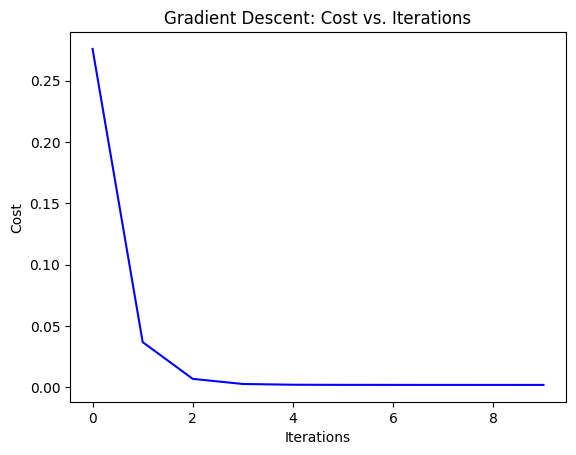

In [13]:

plot_error(cost_history)


- R^2 = 1 - (Σ(e_i)^2 / Σ(y_i - ȳ)^2)

> Σ(e_i)^2: sum of squared errors (distance between data points and regression line)

> Σ(y_i - ȳ)^2: sum of squares of deviations (distance between data points and mean of variable Y)

In [14]:
def test_model_R2(test_data, theta_trained):

    X_test = test_data.iloc[:, :-1].values  # Features
    y_test = test_data.iloc[:, -1].values.reshape(-1, 1)  # Target

    # Add bias term to features for linear regression
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    predictions_test = np.dot(X_test, theta_trained)

    # Calculate Mean Squared Error (MSE)
    # mse = np.mean((predictions_test - y_test) ** 2)

    # Calculate R-squared (coefficient of determination)
    y_mean = np.mean(y_test)
    sst = np.sum((y_test - y_mean) ** 2)  # Total sum of squares
    ssr = np.sum((predictions_test - y_test) ** 2)  # Regression sum of squares
    r_squared = 1 - (ssr / sst) 

    print("---------------------------------------------")
    print(f"Evaluation Metrics:\nRSquared :  {r_squared :.4f}")
    
    # return r_squared

In [15]:
test_model_R2(test_data, theta_trained)

---------------------------------------------
Evaluation Metrics:
RSquared :  0.8097
